1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Text(0.5, 0.98, 'Combination of all scatter plots')

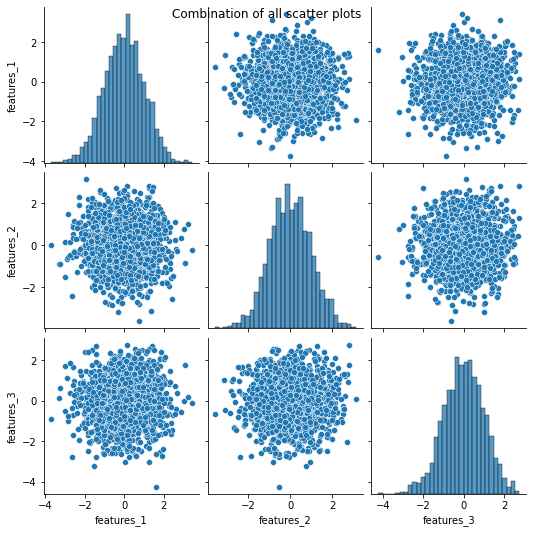

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/anais/Documents/Padova_Class/Python/Lab7/regression_generated.csv')
df = df[['features_1','features_2', 'features_3']]
df
sns.pairplot(df)
plt.suptitle('Combination of all scatter plots')

# Correlation is a statistical term which in common usage refers to how close two variables are
#to having a linear relationship with each other. Here we can see those features are not correlated because 
# they are not linearly dependent.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

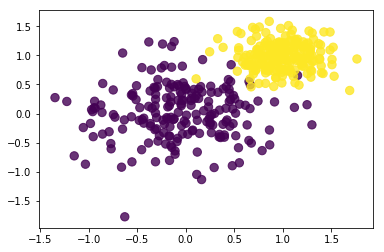

In [45]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

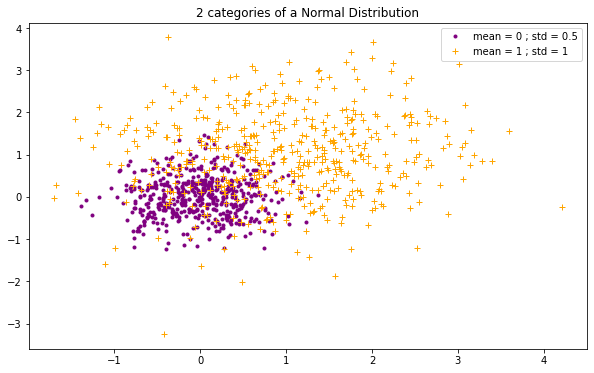

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def Dataset(mean,std):
    category1 = np.random.normal(mean,std, size = 500)
    category2 = np.random.normal(mean,std, size = 500)
    datas = np.column_stack((category1, category2))
    return datas


data1 = Dataset(0,0.5)
data2 = Dataset(1.0,1)
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes

plt.plot(data1[:, 0], data1[:, 1], '.', color = 'purple', label='mean = 0 ; std = 0.5')
plt.plot(data2[:, 0], data2[:, 1], '+', color = 'orange', label='mean = 1 ; std = 1')
plt.title('2 categories of a Normal Distribution')
plt.legend()



!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/anais/Documents/Padova_Class/Python/data

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot


In [325]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/anais/Documents/Padova_Class/Python/data

--2022-11-30 10:28:56--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-11-30 10:28:56--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d24351471407a98696bf66b95.dl.dropboxusercontent.com/cd/0/inline/BxvXY-FF_AY1axmZwkLJBFxojCBlSSrJ1IpGq0F6KFrZpE-Z1Y0wXJsyIHRmDvxzGK_vMZhFjGlNjZChnSO84_yxka6dHZgpTZYm9rvyplnpDn1Vr7jjnzr_nyrKA_21pQkO5TebJvUNE3ZumOgYzIM-Qg9dOxdHRcdabTQDZhYKpw/file# [following]
--2022-11-30 10:28:57--  https://uc7d24351471407a98696bf66b95.dl.dropboxusercontent.com/cd/0/inline/BxvXY-FF_AY1axmZwkLJBFxojCBlSSrJ1IpGq0F6KFrZpE-Z1Y0wXJsyIHRmDvxzGK_vMZhFjGlNjZChnSO84_yxka6

In [47]:
import pickle

filename = '/Users/anais/Documents/Padova_Class/Python/data/residuals_261.pkl'
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

df = pd.DataFrame(new_dict.tolist())
#df
print('number of lines (original): ', len(df))
df2 = df[abs(df['residuals']) <2]
print('number of lines after selection: ', len(df2))
df2




number of lines (original):  11131
number of lines after selection:  10489


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Text(0.5, 0.98, 'Linear regression of distances and residuals with their histogram')

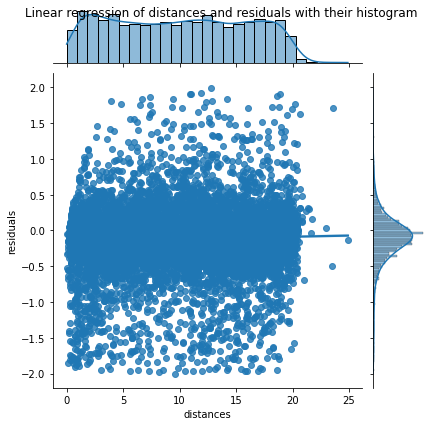

In [48]:
sns.jointplot(x = 'distances', y = 'residuals', data = df2, kind="reg")
plt.suptitle('Linear regression of distances and residuals with their histogram')
# Comment : We can see that the points are directed to the centre
# and the regression line is fitting to the points' direction on the graph. 
# Then, there is a correlation between 'distances' and 'residuals'

# Nevertheless, if we inverse the features and plot the 'residuals' versus the 'distances' (residuals on the x-axis)
# we see that the linear regression is not following the point, so in this case there would be no correlation.

Centers of each distances bins: 
 [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5]
Means of residuals on distances bins: 
 [-0.24681325 -0.12989732 -0.17463489 -0.16243032 -0.13319177 -0.13942494
 -0.10424032 -0.07879165 -0.10530914 -0.10090854 -0.03311745 -0.0914637
 -0.07868601 -0.13182509 -0.14368135 -0.12177526 -0.13945171 -0.16790314
 -0.12161063 -0.05222069  0.062444    0.20133333         nan  0.605     ]
Standard deviation of residuals on distances bins: 
 [0.48732756 0.42182345 0.4262629  0.40975528 0.38458806 0.39801896
 0.43612876 0.46095775 0.44381378 0.42008083 0.43645245 0.47160631
 0.50159408 0.46371072 0.46224375 0.45553885 0.41060295 0.42074562
 0.40744313 0.37218506 0.49910099 0.14407945        nan 1.56270599]
       x         y     err_y
0    0.5 -0.246813  0.487328
1    1.5 -0.129897  0.421823
2    2.5 -0.174635  0.426263
3    3.5 -0.162430  0.409755
4    4.5 -0.133192  0.384588
5    5.5 -0.139

/var/folders/dv/ctwb40g55qxf959xsh2gxtv80000gn/T/ipykernel_78335/785870810.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


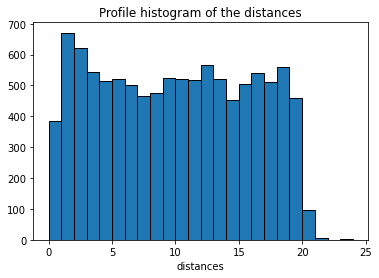

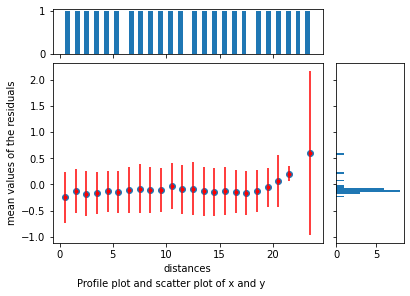

In [51]:
h, bins, _ = plt.hist(df2['distances'], bins=np.arange(df2['distances'].min(), df2['distances'].max()), edgecolor = 'black')
plt.title('Profile histogram of the distances')
plt.xlabel('distances')
x = []
y = []
err_y = []
for i in range(len(bins)-1):
    x.append((bins[i+1]+bins[i])/2)
    index1 = (df2[df2['distances']<bins[i+1]].index)  
    index2 = (df2[df2['distances']>bins[i]].index)
    indexes = index1.intersection(index2)
    #print(indexes)
    y.append(df2.loc[indexes]['residuals'].mean())
    err_y.append(df2.loc[indexes]['residuals'].std())
x = np.asarray(x)
y = np.asarray(y)
err_y = np.asarray(err_y)
print('Centers of each distances bins: \n',x)
print('Means of residuals on distances bins: \n',y)
print('Standard deviation of residuals on distances bins: \n',err_y)


data = pd.DataFrame({'x':x, 'y': y, 'err_y':err_y})
print(data)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.errorbar(
    x,
    y,
    yerr=err_y, fmt='r.',
    marker = '.'
)
    ax_histx.hist(x, bins=50)
    ax_histy.hist(y, bins=25, orientation='horizontal')
    
fig = plt.figure()
#Create the main axes, leaving 25% of the figure space at the top and on the
#right to position marginals.
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()

ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)# x0, y0, width, height
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.xlabel('distances')
plt.ylabel('mean values of the residuals')
plt.suptitle('Profile plot and scatter plot of x and y', fontsize = 10, x = 0.4, y = 0)
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


99.99999999999999
531.3243399683731


/var/folders/dv/ctwb40g55qxf959xsh2gxtv80000gn/T/ipykernel_78335/2601137867.py:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, h, yerr= 1/np.sqrt(h), marker='.', mfc='red')


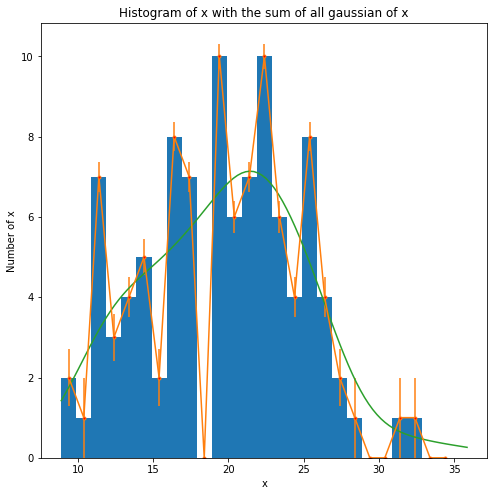

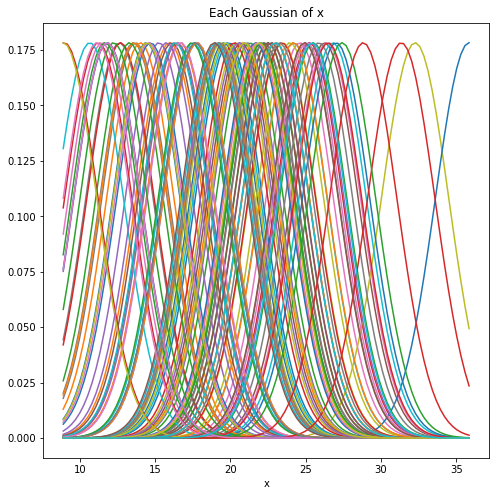

In [39]:
from scipy import stats
import scipy as sc
from matplotlib.ticker import MaxNLocator
#a. 
x = np.random.normal(loc = 20, scale = 5, size= 100)

#b.
fig, ax1 = plt.subplots( figsize=(8, 8))
n_bins = np.arange(x.min(),x.max())
h, bins, _ = plt.hist(x, bins=n_bins)

plt.xlabel('x')
plt.ylabel('Number of x')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))# force to always have integers
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(bin_centers, h, yerr= 1/np.sqrt(h), marker='.', mfc='red')
ax1.set_title('Histogram of x with the sum of all gaussian of x')

#c.

fig, ax2 = plt.subplots(figsize=(8, 8))
std = 1.06*x.std()*x.size**(-1/5)
gauss_list = []
abscisse = np.linspace(x.min(),x.max(),100)
for e in x:
    gauss = stats.norm.pdf(abscisse, e, std)
    gauss_list.append(gauss)
    ax2.plot(abscisse, gauss)
ax2.set_title('Each Gaussian of x')
plt.xlabel('x')
    
#d. Sum
s = np.sum(gauss_list,axis = 0)

#normalization
s_integrale = sc.integrate.trapz(s, abscisse)
s_norm = s*len(x)/s_integrale

integ_s_norm = sc.integrate.trapz(s_norm, abscisse)
print(integ_s_norm)
original_integrale = sc.integrate.trapz(x, abscisse)
print(original_integrale)

ax1.plot(abscisse, s_norm)

